In [1]:
import obspy
from obspy.io.sac.sactrace import SACTrace
from obspy.io.sac.util import get_sac_reftime
import os
import glob
import sys

In [2]:
def do_resample(data_dir, sample_rate):
    """
    resample data
    """
    print("Sampling")
    if not os.path.exists(data_dir):
        print("Missing File: %s" % data_dir)
    total_run_num = len(os.listdir(data_dir))
    run_num = 0
    for ev in os.listdir(data_dir):
        run_num+=1
        if run_num % 10 == 0 or run_num== 1:
            print(f"Sampling run {run_num} of {total_run_num}")
        inpath = os.path.join(data_dir, ev)
        
        for sac in os.listdir(inpath):
            insac = os.path.join(inpath, sac)
            st = obspy.read(insac)
            
            # resample
            #resampling is changing the sample rate, i.e. 1/period , (period = delta t * number of pts)
            st.resample(sample_rate, no_filter="False")
            
            st[0].write(insac, format='SAC')
    print("Sampling success")

In [3]:
def do_filter(data_dir, freq_low, freq_high, phase):
    """
    filter data
    """
    #print("Filtering")
    if not os.path.exists(data_dir):
        print("Missing File: %s" % data_dir)
    total_run_num = len(os.listdir(data_dir))
    run_num = 0
    for ev in os.listdir(data_dir):
        run_num+=1
        if run_num % 10 == 0 or run_num== 1:
            print(f"Filtering run {run_num} of {total_run_num}")
        inpath = os.path.join(data_dir, ev)
        # remove the existed filtered files *.bp
        for bp in glob.glob(f"{inpath}/*.bp*"):
            os.remove(bp)
        
        for sac in os.listdir(inpath):
            insac = os.path.join(inpath, sac)
            st = obspy.read(insac)

            # rmean, rtrend & taper
            # minus the mean, the trend and smoothes out the ends
            st.detrend("demean")
            st.detrend("linear")
            st.taper(max_percentage=0.05, type='hann')
            
            # bandpass
            # filters out the lower and higher frequencies, zerophase means to have no phase shift
            st.filter('bandpass', freqmin=freq_low, freqmax=freq_high, corners=2, zerophase=phase)
            
            #adding the bp to indicate that the trace has been filtered
            st[0].write(insac +".bp", format='SAC')
    print("filtering success")

In [4]:
def do_alignP(data_dir, time_before, time_after):
    """
    align data according P (the phase has been written in sacheader)
    """
    if not os.path.exists(data_dir):
        print("Missing File: %s" % data_dir)
    total_run_num = len(os.listdir(data_dir))
    run_num = 0
    error_num = 0
    switch = True
    for ev in os.listdir(data_dir):
        inpath = os.path.join(data_dir, ev)
        run_num+=1
        if run_num % 10 == 0 or run_num== 1:
            print(f"alignment run {run_num} of {total_run_num}")
        
        for bp in glob.glob(f"{inpath}/*.bp"):
            #print(bp)
            # align waveform according to P
            sac = SACTrace.read(bp)
           
            try: 
                # this is shifting the trace such that the p phase starts at 0
                sac._allt(-1*sac.t1)
            except:
                print("error occured in run: ", run_num)
                error_num+= 1
                #print(sac)
                #sys.exit(0)
                print(f"cumulative errors occured {error_num}")
                break
                
                #print(sac.t1)
                
            #print()
            sac.write(bp, headonly=True)
            # cut the waveform within a given time window
            tr = obspy.read(bp)
            
            T = get_sac_reftime(tr[0].stats.sac) + tr[0].stats.sac.t1
            tr.trim(starttime = T+time_before, endtime = T+time_after, fill_value=0)
            tr[0].write(bp +".cut", format='SAC')
            
    print("alignment success")

In [11]:
# filter data
data_sac = "./Download/SAC"

do_filter(data_sac, 1.0, 8.0, "TRUE")
do_resample(data_sac, 100)

Filtering run 1 of 514
Filtering run 10 of 514
Filtering run 20 of 514
Filtering run 30 of 514
Filtering run 40 of 514
Filtering run 50 of 514
Filtering run 60 of 514
Filtering run 70 of 514
Filtering run 80 of 514
Filtering run 90 of 514
Filtering run 100 of 514
Filtering run 110 of 514
Filtering run 120 of 514
Filtering run 130 of 514
Filtering run 140 of 514
Filtering run 150 of 514
Filtering run 160 of 514
Filtering run 170 of 514
Filtering run 180 of 514
Filtering run 190 of 514
Filtering run 200 of 514
Filtering run 210 of 514
Filtering run 220 of 514
Filtering run 230 of 514
Filtering run 240 of 514
Filtering run 250 of 514
Filtering run 260 of 514
Filtering run 270 of 514
Filtering run 280 of 514
Filtering run 290 of 514
Filtering run 300 of 514
Filtering run 310 of 514
Filtering run 320 of 514
Filtering run 330 of 514
Filtering run 340 of 514
Filtering run 350 of 514
Filtering run 360 of 514
Filtering run 370 of 514
Filtering run 380 of 514
Filtering run 390 of 514
Filtering r

In [2]:
data_sac = "./Download/SAC"

In [13]:
# cut the waveform within the given time window
do_alignP(data_sac, -30, 120)

alignment run 1 of 514
alignment run 10 of 514
alignment run 20 of 514
alignment run 30 of 514
alignment run 40 of 514
alignment run 50 of 514
alignment run 60 of 514
alignment run 70 of 514
alignment run 80 of 514
alignment run 90 of 514
alignment run 100 of 514
alignment run 110 of 514
alignment run 120 of 514
alignment run 130 of 514
alignment run 140 of 514
alignment run 150 of 514
alignment run 160 of 514
alignment run 170 of 514
alignment run 180 of 514
alignment run 190 of 514
alignment run 200 of 514
alignment run 210 of 514
alignment run 220 of 514
alignment run 230 of 514
alignment run 240 of 514
alignment run 250 of 514
alignment run 260 of 514
alignment run 270 of 514
alignment run 280 of 514
alignment run 290 of 514
alignment run 300 of 514
alignment run 310 of 514
alignment run 320 of 514
alignment run 330 of 514
alignment run 340 of 514
alignment run 350 of 514
alignment run 360 of 514
alignment run 370 of 514
alignment run 380 of 514
alignment run 390 of 514
alignment r

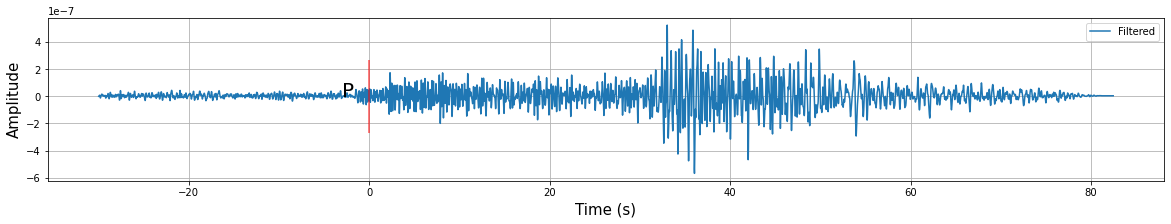

In [1]:
# Quick waveform check
from obspy import read
from obspy.io.sac import SACTrace 
import matplotlib.pyplot as plt
import numpy as np

wtdir="./Download/SAC"
evt = "20220102001614080"
st = read(f"{wtdir}/{evt}/AZ.BZN..BHE.SAC.bp.cut")

d1 = st[0].data
d1 -= d1[0]

t = np.arange(st[0].stats.sac.b, st[0].stats.npts / st[0].stats.sampling_rate + st[0].stats.sac.b, st[0].stats.delta)

if len(t) == (len(d1)+1):
    t = np.delete(t, t[-1])

plt.figure(figsize=(20,3))
plt.plot(t,d1,label="Filtered")
#first-P arrival
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(d1)*0.5, max(d1)*0.5], color="red", alpha=0.5, linewidth=2)
plt.text(st[0].stats.sac.t1-3, -1*max(d1)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.xlabel("Time (s)",fontsize=15)
plt.grid()

plt.show()